In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for forming table to visualize results
from tabulate import tabulate

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import  MinMaxScaler

# Data Loading and Overviewing

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
print(f'The dateset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dateset has 374 rows and 13 columns.


In [5]:
print('Columns of dataset\n__________________________________________________________________________________________________')
# Print the columns of the dataset
print('Sleep Efficiency Dataset:', df.columns)

Columns of dataset
__________________________________________________________________________________________________
Sleep Efficiency Dataset: Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [6]:
# Print unique values in each column of the dataset
for col in df.columns:
    print("Unique values in column '{}' are:".format(col))
    print(df[col].unique())

Unique values in column 'Person ID' are:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 2

# Data Cleaning

In [7]:
# Check for any missing values or inconsistencies in the dataset
print("Check for missing valuest\n________________________________________")
print(df.isnull().sum())
print('________________________________________\nNumber of records in total: {}\nNumber of records that has NaN values: {}'.format(df.shape[0], df.isnull().sum(axis=1).astype(bool).sum()))

Check for missing valuest
________________________________________
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64
________________________________________
Number of records in total: 374
Number of records that has NaN values: 219


In [8]:
df.fillna("No Sleep disorder", inplace=True)

The NaN value indicates that the person do not have any sleeping disorder (imsomnia and sleep apnae), therefore we just replace the NaN value with "No Sleep Disorder"

In [9]:
# Check for any missing values or inconsistencies in the dataset
print("Check for missing valuest\n________________________________________")
print(df.isnull().sum())
print('________________________________________\nNumber of records in total: {}\nNumber of records that has NaN values: {}'.format(df.shape[0], df.isnull().sum(axis=1).astype(bool).sum()))

Check for missing valuest
________________________________________
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64
________________________________________
Number of records in total: 374
Number of records that has NaN values: 0


In [10]:
# Splitting and Processing Blood Pressure Data
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
df = df.drop('Blood Pressure', axis=1)

In [11]:
df['Systolic Pressure'] = pd.to_numeric(df['Systolic Pressure'])
df['Diastolic Pressure'] = pd.to_numeric(df['Diastolic Pressure'])

The code above splits the 'Blood Pressure' column into two separate columns, 'Systolic Pressure' and 'Diastolic Pressure', by splitting the values on the '/' character. The resulting values are then stored in separate columns.

In [12]:
print('There are {} duplicate values.'.format(df.duplicated().sum()))

There are 0 duplicate values.


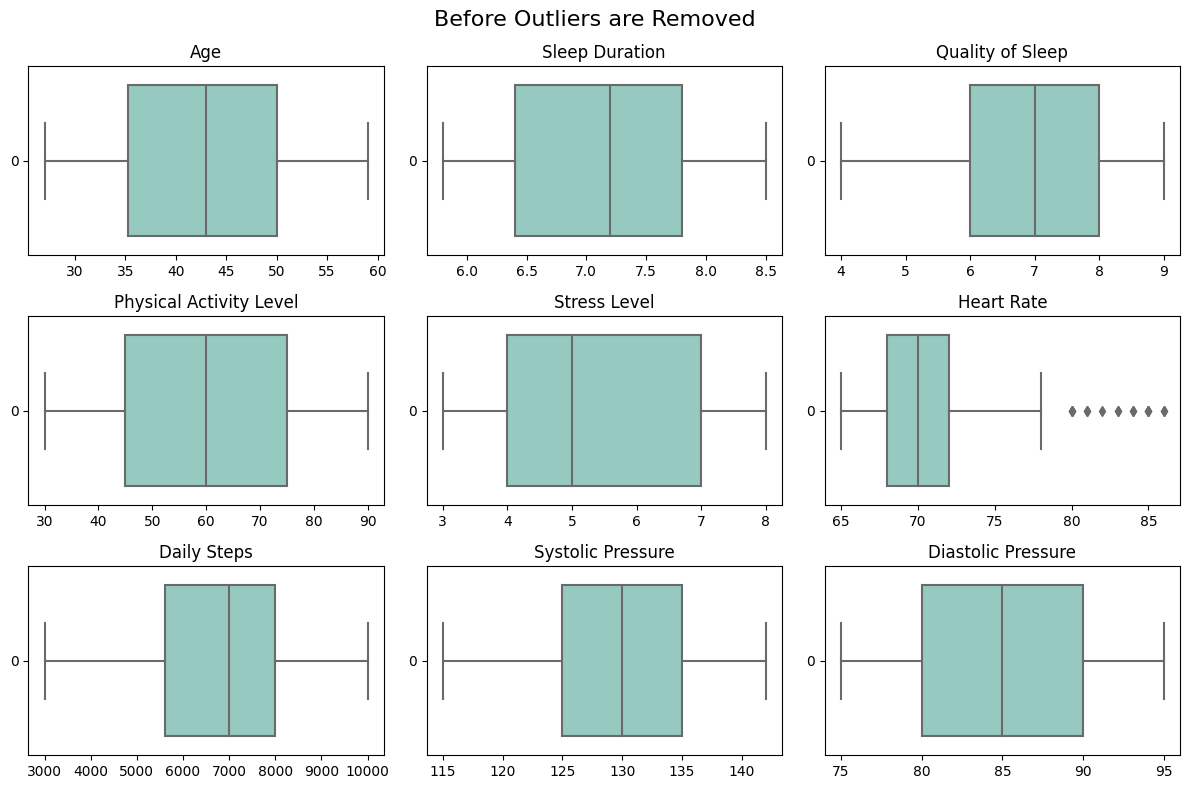

In [13]:
# Visualise boxplot to check for outliers
sns.set_palette("Set3")
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep',
                      'Physical Activity Level', 'Stress Level', 'Heart Rate',
                      'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(df[feature], orient='h', ax=axs[row, col]).set(title=feature)
plt.suptitle("Before Outliers are Removed", fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
from scipy import stats
# Calculate z-scores for the 'Heart Rate' feature
z_scores = stats.zscore(df['Heart Rate'])

# Define threshold for outlier detection
threshold = 4

# Identify outliers
outliers = np.abs(z_scores) > threshold

# Remove outliers from the DataFrame
df_cleaned = df[~outliers]

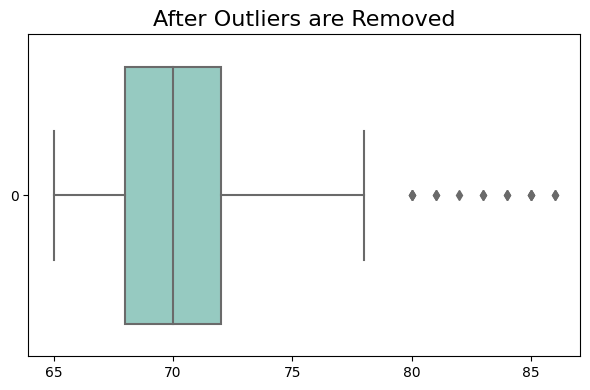

In [15]:
# Visualise feature that contain outlier that has been removed
sns.set_palette("Set3")

fig, axs = plt.subplots(figsize=(6, 4))

sns.boxplot(df_cleaned['Heart Rate'], orient='h').set(title='Heart Rate')

plt.title("After Outliers are Removed", fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
#check skewness of data
skewness = df_cleaned[numerical_features].skew()

for feature, skew in skewness.items():
    print(f"Skewness of {feature}: {skew}")

Skewness of Age: 0.2572221422742844
Skewness of Sleep Duration: 0.037554389846484834
Skewness of Quality of Sleep: -0.20744763173836073
Skewness of Physical Activity Level: 0.07448690272010197
Skewness of Stress Level: 0.15432958161578225
Skewness of Heart Rate: 1.2248235470533522
Skewness of Daily Steps: 0.17827733092832274
Skewness of Systolic Pressure: -0.03566886755375485
Skewness of Diastolic Pressure: 0.37857012033973636


# Exploratory Data Analaysis

In [17]:
# Summary Statistics
df_cleaned.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


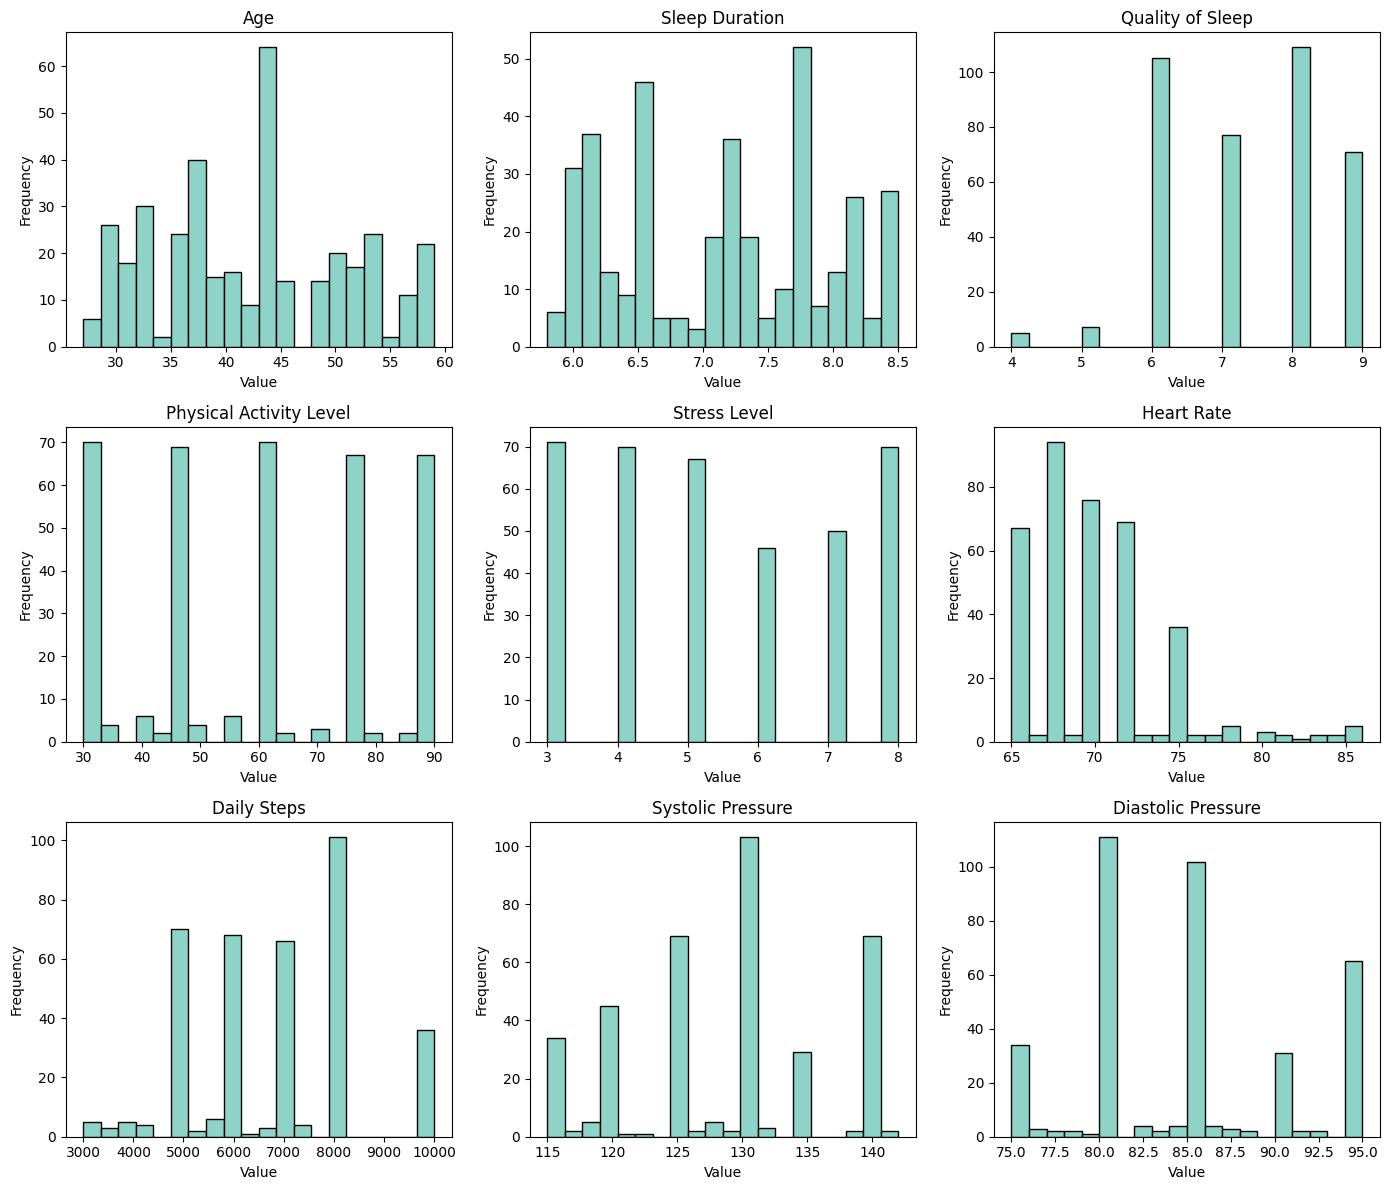

In [18]:
# Visualise the frequency of numerical feature
# Selecting the numerical features
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                      'Stress Level', 'Heart Rate', 'Daily Steps',
                      'Systolic Pressure', 'Diastolic Pressure']

# Calculate the number of rows and columns for the subplots
num_rows = (len(numerical_features) - 1) // 3 + 1
num_cols = min(len(numerical_features), 3)

# Creating subplots for histograms
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
axs = axs.flatten()

# Plotting histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    axs[i].hist(df_cleaned[feature], bins=20, edgecolor='black')
    axs[i].set_title(feature)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjusting the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

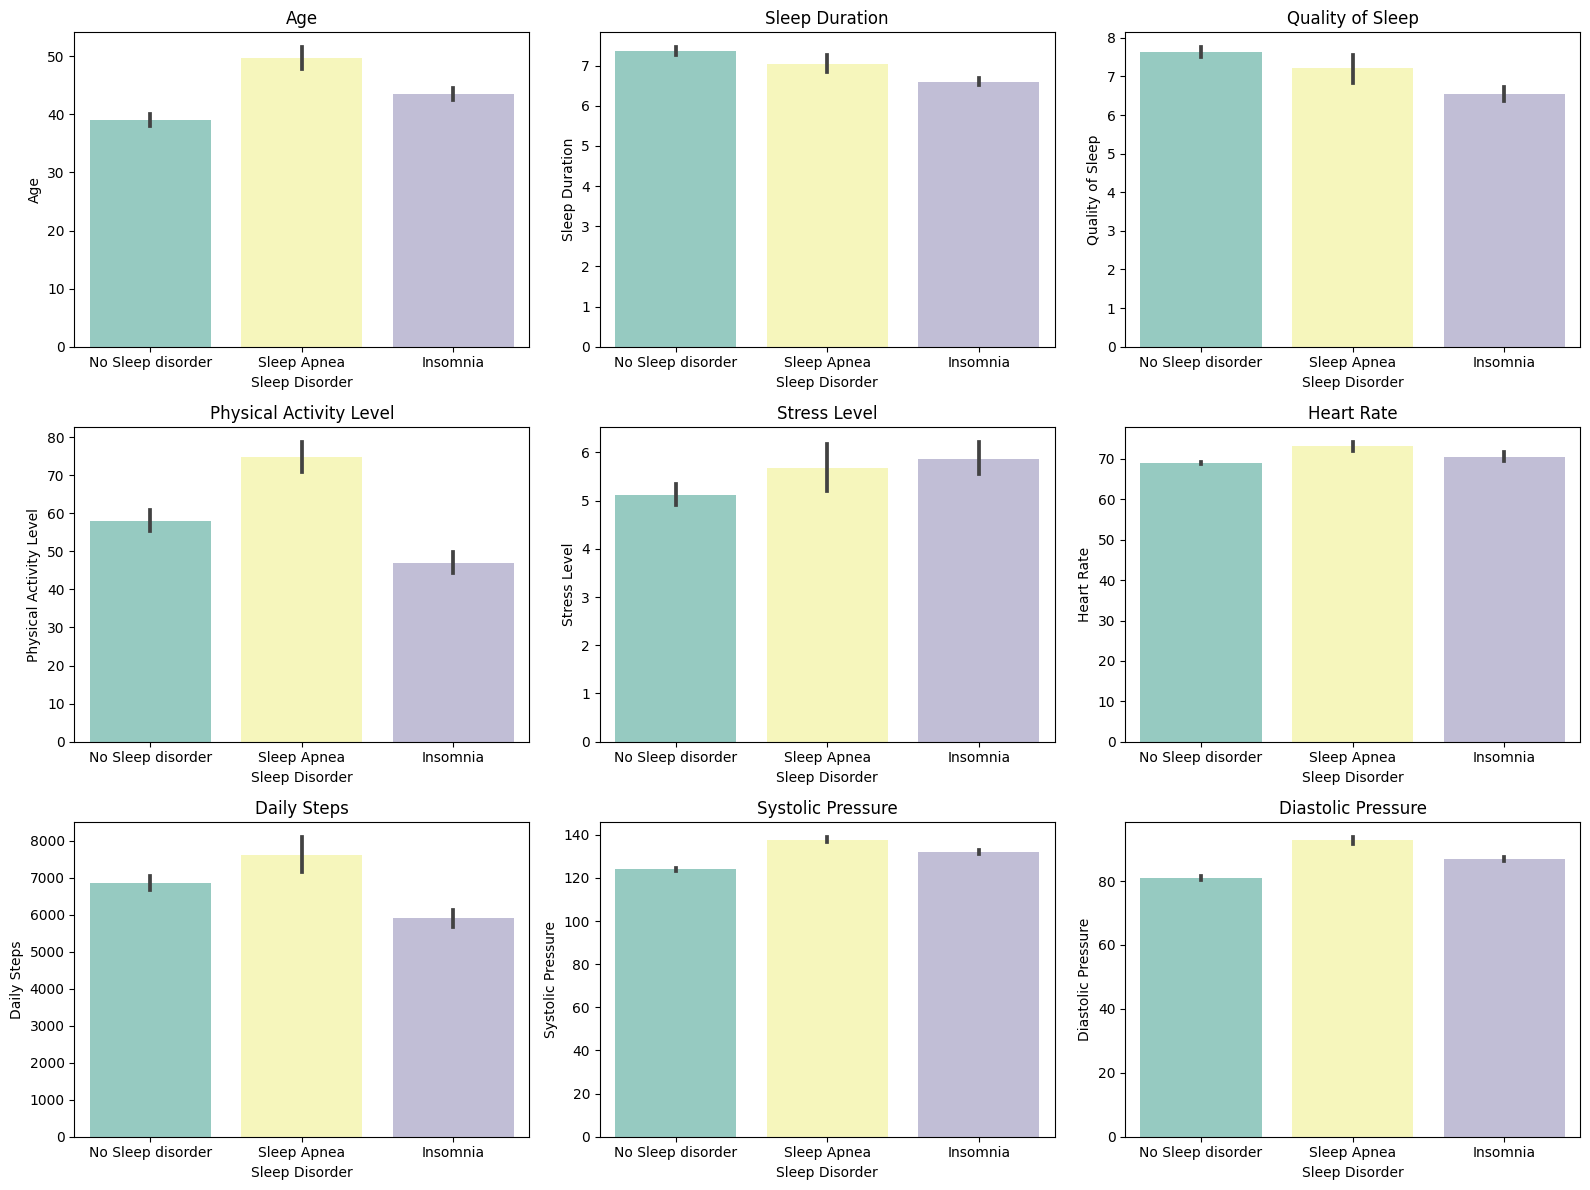

In [19]:
# Visualise the relationship between numerical feature and target variable
# Calculate the number of rows and columns for the subplots
num_rows = (len(numerical_features) - 1) // 3 + 1
num_cols = min(len(numerical_features), 3)

# Creating subplots for box plots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
axs = axs.flatten()

# Plotting box plots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.barplot(data=df_cleaned, x='Sleep Disorder', y=feature, ax=axs[i])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Sleep Disorder')
    axs[i].set_ylabel(feature)

# Adjusting the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

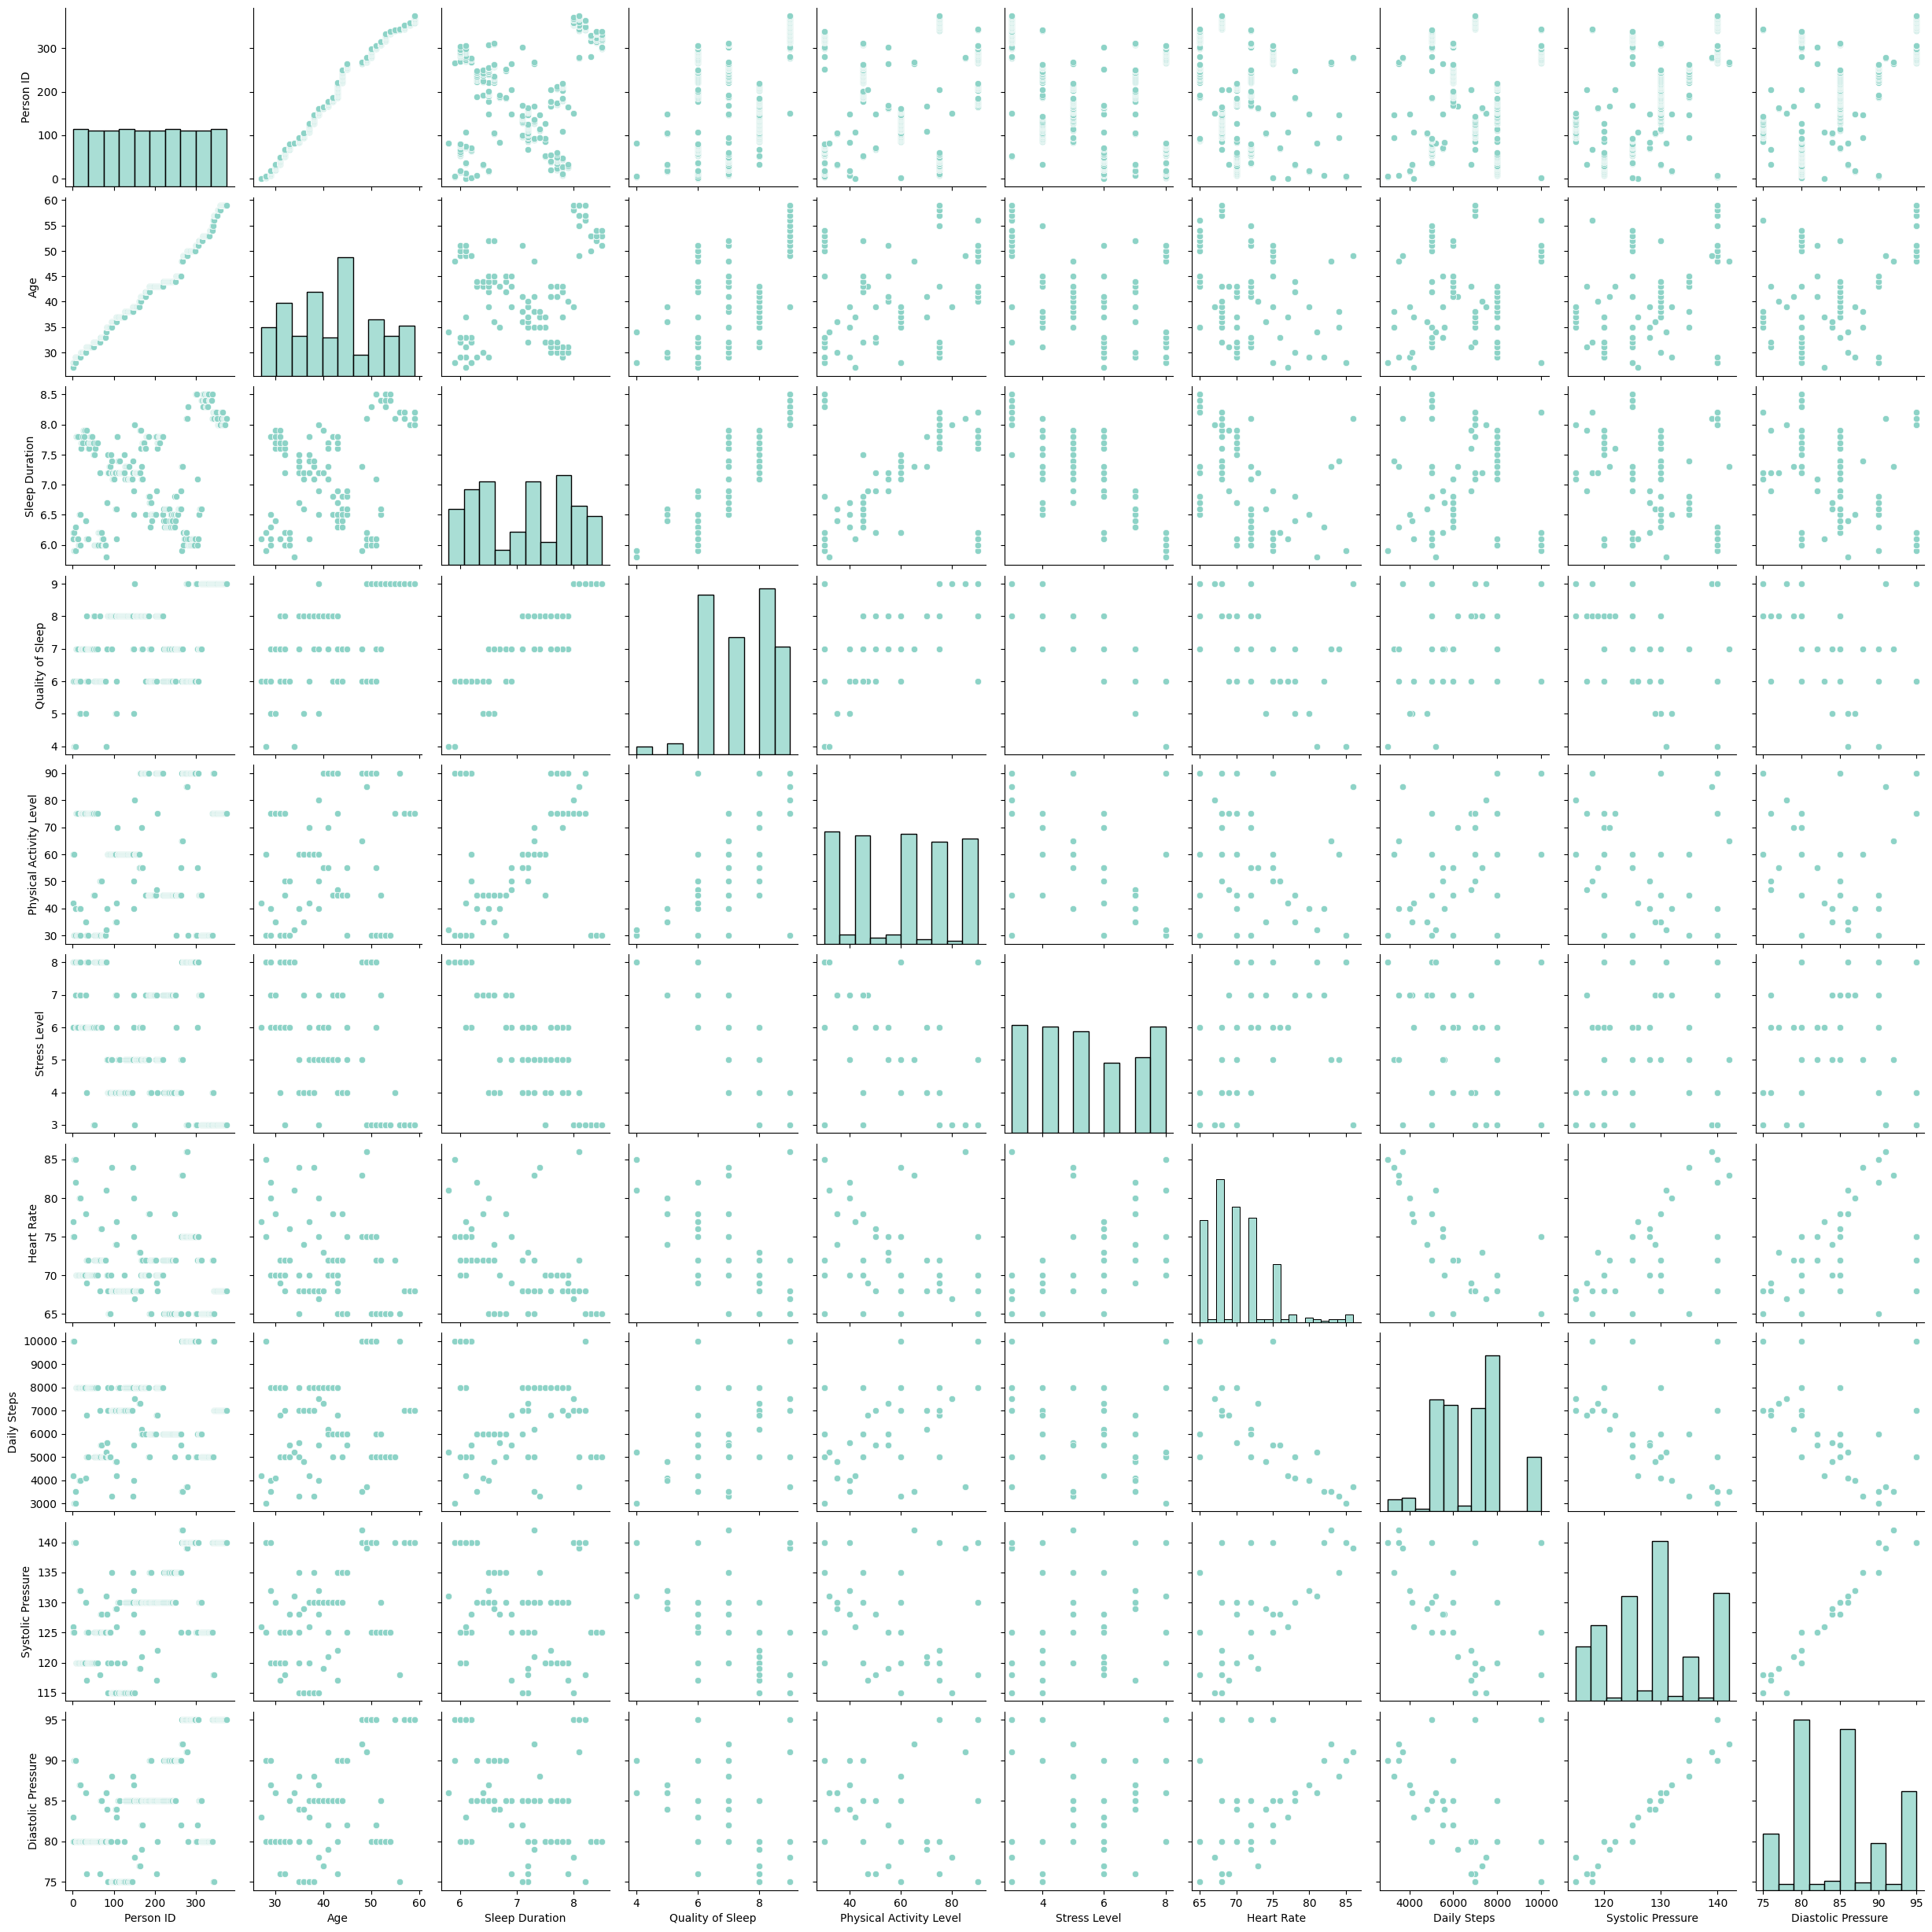

In [20]:
# Visualize numeric variables
sns.pairplot(df_cleaned)
plt.show()

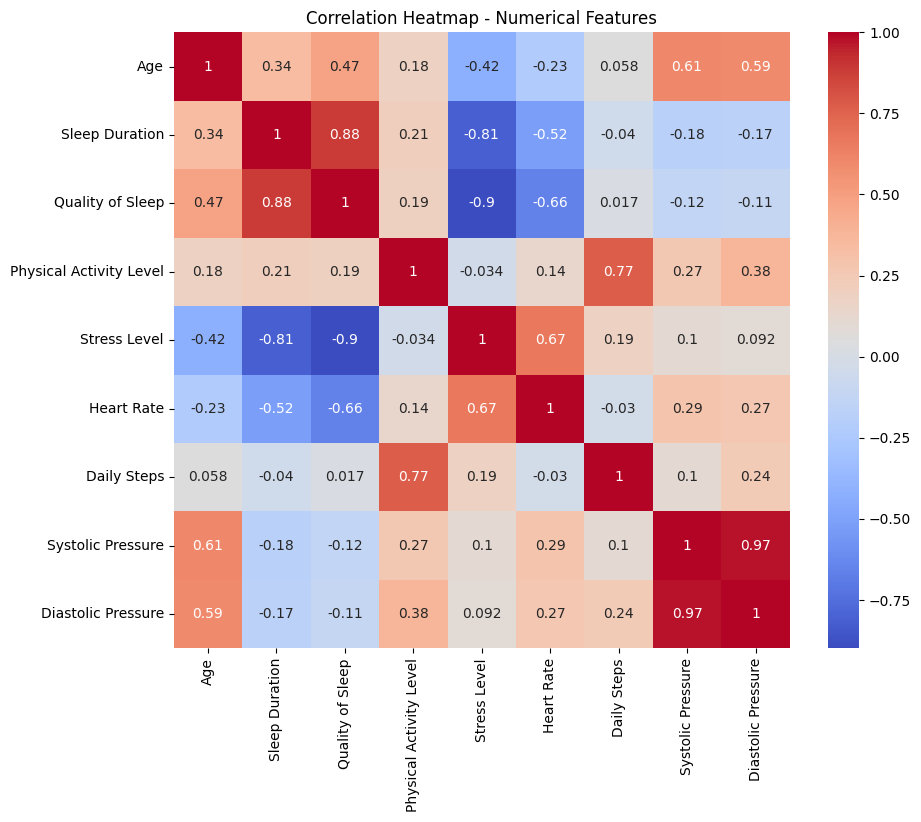

In [21]:
# Correlation Analysis: Analyze the relationships between numeric variables by calculating correlation coefficients.
corr_matrix = df_cleaned[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title and display the plot
plt.title('Correlation Heatmap - Numerical Features')
plt.show()

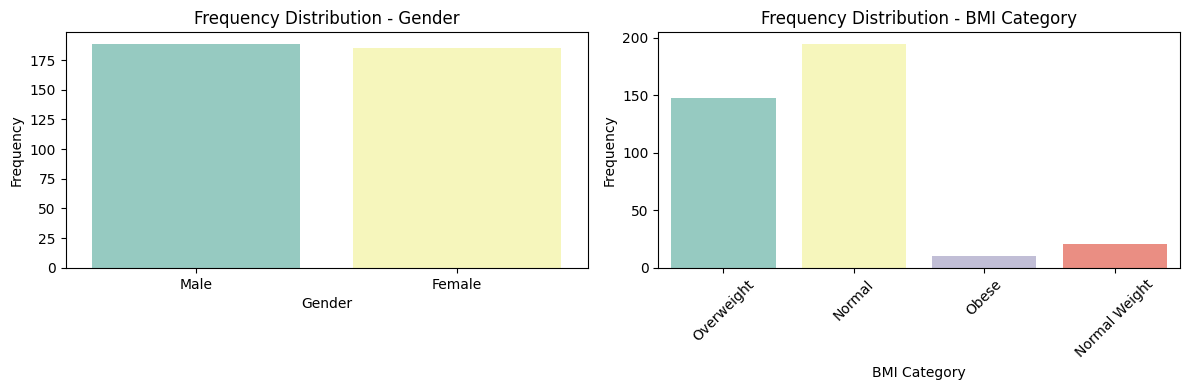

In [22]:
# Visualise frequency of categorial variable
# Selecting the categorical features
categorical_features = ['Gender', 'BMI Category']

# Create subplots for count plots
fig, axs = plt.subplots(1, len(categorical_features), figsize=(12, 4))
axs = axs.flatten()

# Plot count plots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_cleaned, x=feature, ax=axs[i])
    axs[i].set_title('Frequency Distribution - {}'.format(feature))
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')

    # Adjusting the x-axis labels rotation for 'BMI Category'
    if feature == 'BMI Category':
        axs[i].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

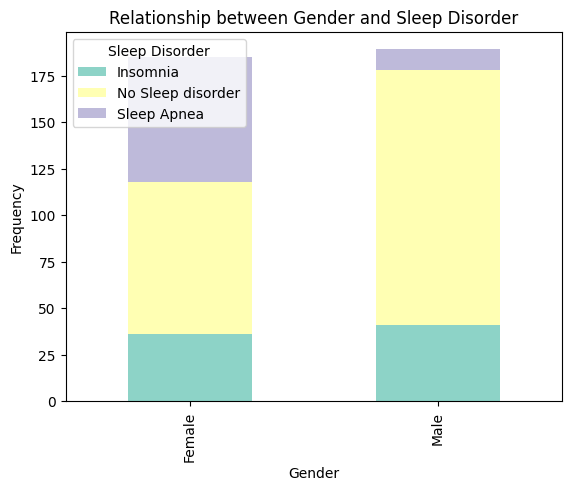

<Figure size 1000x600 with 0 Axes>

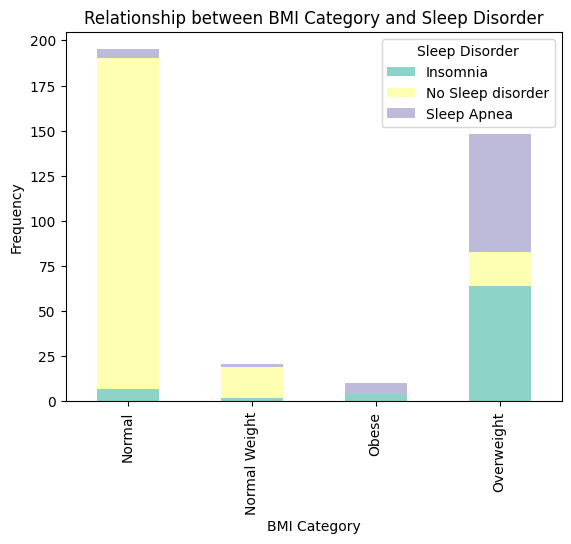

In [23]:
# Create a cross-tabulation of the categorical feature and the target variable
for feature in categorical_features:
    cross_tab = pd.crosstab(df_cleaned[feature], df_cleaned['Sleep Disorder'])

    # Plot a stacked bar chart
    plt.figure(figsize=(10, 6))
    cross_tab.plot(kind='bar', stacked=True)

    # Set the labels and title
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Relationship between {} and Sleep Disorder'.format(feature))

    # Add a legend
    plt.legend(title='Sleep Disorder')

    # Display the chart
    plt.show()

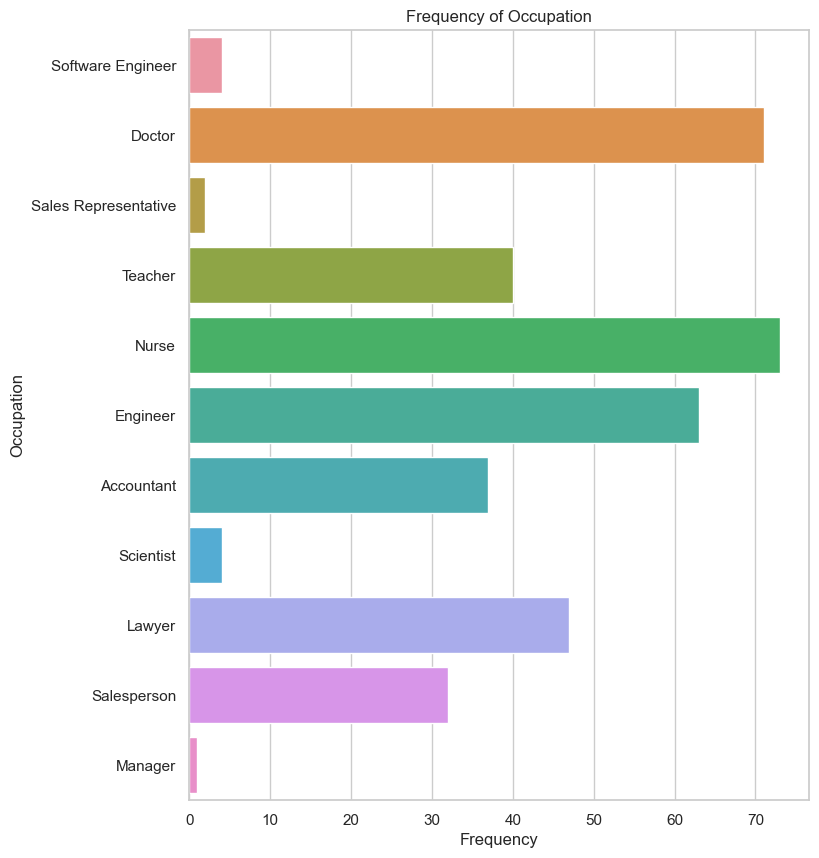

In [24]:
# Visualise the frequency of occupation
sns.set(style="whitegrid")
plt.figure(figsize=(8, 10))
ax = sns.countplot(y='Occupation', data=df)
plt.ylabel('Occupation')
plt.xlabel('Frequency')
plt.title('Frequency of Occupation')
plt.show()

<Figure size 1000x600 with 0 Axes>

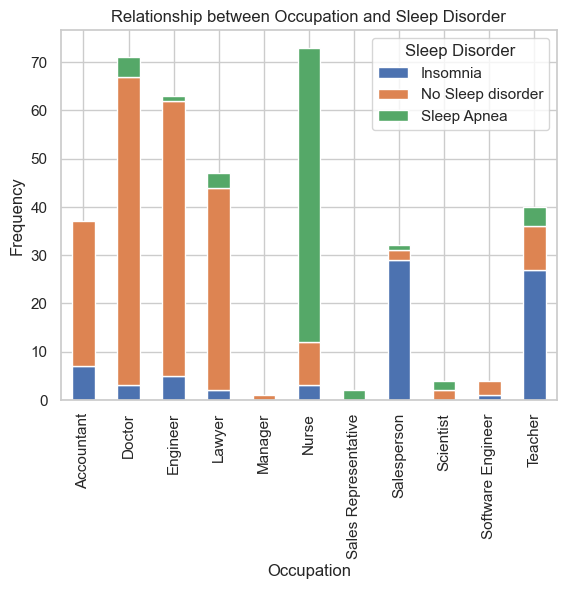

In [25]:
# Create a cross-tabulation of the "Occupation" feature and the "Sleep Disorder" target variable
cross_tab = pd.crosstab(df_cleaned['Occupation'], df_cleaned['Sleep Disorder'])

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Relationship between Occupation and Sleep Disorder')

# Add a legend
plt.legend(title='Sleep Disorder')

# Display the chart
plt.show()

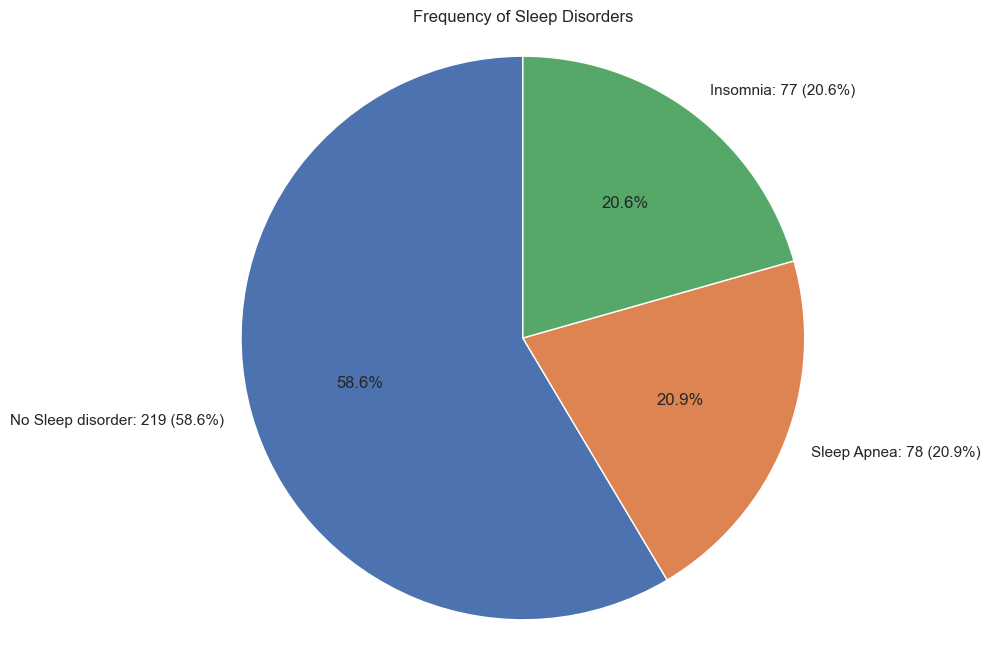

In [26]:
# Visualise frequency of target variable
# Count the frequency of each sleep disorder
sleep_disorder_counts = df_cleaned['Sleep Disorder'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%1.1f%%', startangle=90)

# Add count values to the pie chart
for i, count in enumerate(sleep_disorder_counts):
    percentage = count / sum(sleep_disorder_counts) * 100
    texts[i].set_text(f'{sleep_disorder_counts.index[i]}: {count} ({percentage:.1f}%)')

# Set the aspect ratio to be equal for a circular pie chart
plt.axis('equal')
plt.title('Frequency of Sleep Disorders')

# Display the chart
plt.show()

# Data Preprocessing

Handle Categorial Variable

In [27]:
# Drop the 'ID' column
df_cleaned = df_cleaned.drop(['Person ID'], axis=1)

In [28]:
# Map values in 'Gender' column
gender_mapping = {'Male': 1, 'Female': 0}
df_cleaned['Gender'] = df_cleaned['Gender'].map(gender_mapping)

# Map values in 'BMI Category' column
bmi_mapping = {'Normal': 0, 'Normal Weight': 0, 'Overweight': 1, 'Obese': 2}
df_cleaned['BMI Category'] = df_cleaned['BMI Category'].map(bmi_mapping)

In [29]:
# Create new columns for Insomnia and Sleep Apnea
df_cleaned['Insomnia'] = (df_cleaned['Sleep Disorder'] == 'Insomnia').astype(int)
df_cleaned['Sleep Apnea'] = (df_cleaned['Sleep Disorder'] == 'Sleep Apnea').astype(int)

df_cleaned.loc[df_cleaned['Sleep Disorder'] == 'No Sleep disorder', ['Insomnia', 'Sleep Apnea']] = 0
df_cleaned.loc[df_cleaned['Sleep Disorder'] == 'Insomnia', 'Insomnia'] = 1
df_cleaned.loc[df_cleaned['Sleep Disorder'] == 'Insomnia', 'Sleep Apnea'] = 0
df_cleaned.loc[df_cleaned['Sleep Disorder'] == 'Sleep Apnae', 'Insomnia'] =0
df_cleaned.loc[df_cleaned['Sleep Disorder'] == 'Sleep Apnea', 'Sleep Apnea'] = 1


# Drop the original Sleep Disorder column
df_cleaned = df_cleaned.drop('Sleep Disorder', axis=1)



In [30]:
# Perform one-hot encoding for the Occupation column
df_encoded = pd.get_dummies(df_cleaned, columns=['Occupation'])

# Replace True with 0 and False with 1
df_encoded = df_encoded.replace({True: 1, False: 0})


Data Normalisation using Standard Scalar

In [31]:
from sklearn.preprocessing import StandardScaler

# Separate the features and target variables
X = df_encoded.drop(['Insomnia', 'Sleep Apnea'], axis=1)
y = df_encoded[['Insomnia', 'Sleep Apnea']]

# Apply standard scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features and target variables
df_scaled['Insomnia'] = y['Insomnia']
df_scaled['Sleep Apnea'] = y['Sleep Apnea']

# Fill missing target values with 0
df_scaled['Insomnia'].fillna(0, inplace=True)
df_scaled['Sleep Apnea'].fillna(0, inplace=True)

# Model Developing - Different Classification Model 

### Splitting into training set and testing set

In [32]:
# Separate the features and target variables
X = df_scaled.drop(['Insomnia', 'Sleep Apnea'], axis=1)
y = df_scaled[['Insomnia', 'Sleep Apnea']]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Create Methods for model development,performance matrics and visualisation of traning set

In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_multilabel_classifier(X_train, y_train, classifier, classifier_name):
    # Perform cross-validation on the training data
    y_pred_train = cross_val_predict(classifier, X_train, y_train, cv=5)

    # Create a DataFrame with actual and predicted values
    df_actual_pred = pd.DataFrame({'Actual': np.ravel(y_train), 'Predicted': np.ravel(y_pred_train)})

    # Plot the actual vs predicted values
    plt.scatter(df_actual_pred.index, df_actual_pred['Actual'], color='b', label='Actual')
    plt.scatter(df_actual_pred.index, df_actual_pred['Predicted'], color='r', label='Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Target Variable')
    plt.title(f'Actual vs Predicted - {classifier_name} (Training Data)', loc='left')
    plt.legend()
    plt.show()

    # Compute confusion matrix
    cm_train = confusion_matrix(np.ravel(y_train), np.ravel(y_pred_train))

    # Visualize confusion matrix
    plt.figure()
    sns.heatmap(cm_train, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {classifier_name} (Training Data)", loc='left')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Calculate performance metrics for each target variable
    performance_train = {}

    for i in range(y_train.shape[1]):
        target_name = y_train.columns[i]
        accuracy = accuracy_score(y_train.iloc[:, i], y_pred_train[:, i])
        precision = precision_score(y_train.iloc[:, i], y_pred_train[:, i])
        recall = recall_score(y_train.iloc[:, i], y_pred_train[:, i])
        f1 = f1_score(y_train.iloc[:, i], y_pred_train[:, i])

        performance_train[f'{target_name}_Accuracy'] = accuracy
        performance_train[f'{target_name}_Precision'] = precision
        performance_train[f'{target_name}_Recall'] = recall
        performance_train[f'{target_name}_F1_Score'] = f1

        # Print classification report for the target variable
        classification_report_i = classification_report(y_train.iloc[:, i], y_pred_train[:, i])
        print(f"Classification Report - Target {target_name}:")
        print(classification_report_i)

    # Print the results
    print(f"Classifier: {classifier_name}")
    for metric_name, metric_value in performance_train.items():
        print(f"{metric_name}: {metric_value:.5f}")

In [34]:
def evaluation_matrices(X_train, y_train, classifier, classifier_name):
    # Perform cross-validation on the training data
    y_pred_train = cross_val_predict(classifier, X_train, y_train, cv=5)

    # Calculate performance metrics for each target variable
    performance_train = {}

    for i in range(y_train.shape[1]):
        target_name = y_train.columns[i]
        accuracy = accuracy_score(y_train.iloc[:, i], y_pred_train[:, i])
        precision = precision_score(y_train.iloc[:, i], y_pred_train[:, i])
        recall = recall_score(y_train.iloc[:, i], y_pred_train[:, i])
        f1 = f1_score(y_train.iloc[:, i], y_pred_train[:, i])

        performance_train[f'{target_name}_Accuracy'] = accuracy
        performance_train[f'{target_name}_Precision'] = precision
        performance_train[f'{target_name}_Recall'] = recall
        performance_train[f'{target_name}_F1_Score'] = f1

    return performance_train

### Support Vector Machine(SVM)

Since we have two output variables to be predicted (insomnia and sleep apnea), we used the Multiple Output Classifier. The Multiple Output Classifier is an extension of traditional classifiers that allows for the prediction of multiple output variables simultaneously. It takes into account the dependencies between the output variables and aims to provide accurate predictions for each output variable.

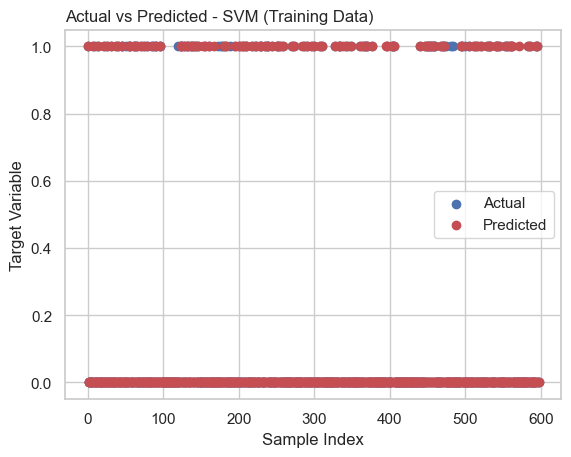

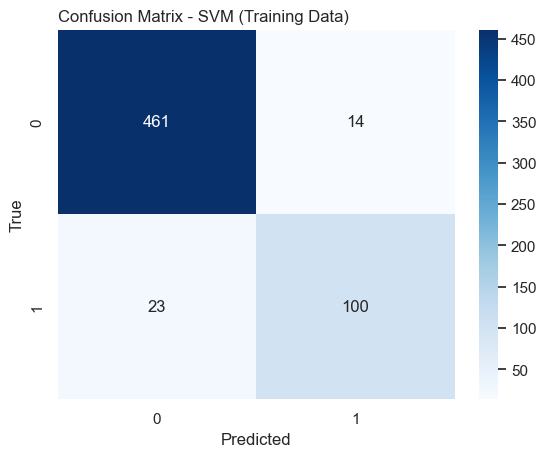

Classification Report - Target Insomnia:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
           1       0.89      0.82      0.85        61

    accuracy                           0.94       299
   macro avg       0.92      0.90      0.91       299
weighted avg       0.94      0.94      0.94       299

Classification Report - Target Sleep Apnea:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       237
           1       0.86      0.81      0.83        62

    accuracy                           0.93       299
   macro avg       0.91      0.89      0.90       299
weighted avg       0.93      0.93      0.93       299

Classifier: SVM
Insomnia_Accuracy: 0.94314
Insomnia_Precision: 0.89286
Insomnia_Recall: 0.81967
Insomnia_F1_Score: 0.85470
Sleep Apnea_Accuracy: 0.93311
Sleep Apnea_Precision: 0.86207
Sleep Apnea_Recall: 0.80645
Sleep Apnea_F1_Score: 0.83333


In [35]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn import svm

classifier1 = MultiOutputClassifier(svm.SVC())
evaluate_multilabel_classifier(X_train, y_train, classifier1, "SVM")

**SVM (Support Vector Machine)** is a supervised machine learning algorithm that can be used for classification tasks, including predicting sleeping disorders. The SVM model works by finding an optimal hyperplane that separates different classes in the data. It aims to maximize the margin between the hyperplane and the closest data points of each class, thereby creating a clear decision boundary. By mapping input data into a higher-dimensional feature space, SVM can effectively capture complex relationships and nonlinear patterns in the data. 

### Logistic Regression

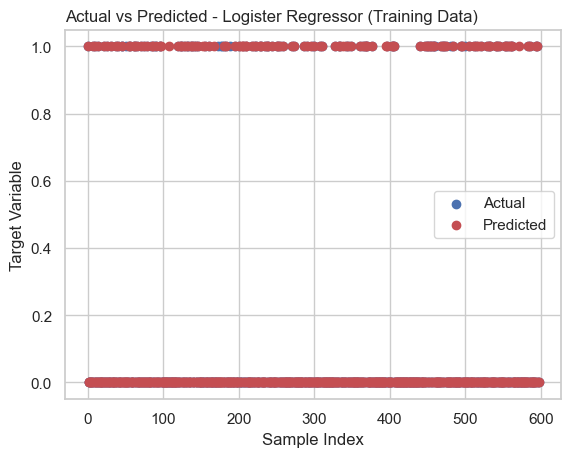

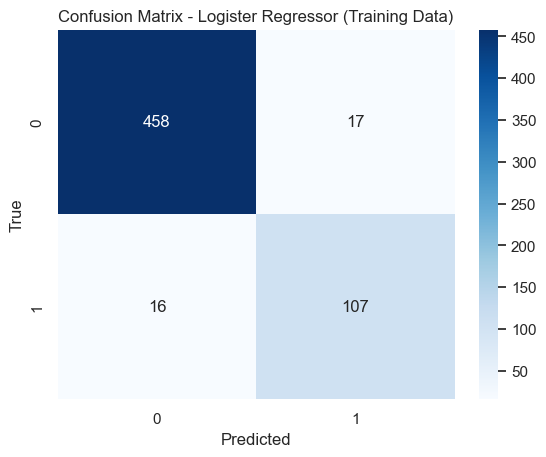

Classification Report - Target Insomnia:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       238
           1       0.88      0.87      0.88        61

    accuracy                           0.95       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.95      0.95      0.95       299

Classification Report - Target Sleep Apnea:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       237
           1       0.84      0.87      0.86        62

    accuracy                           0.94       299
   macro avg       0.90      0.91      0.91       299
weighted avg       0.94      0.94      0.94       299

Classifier: Logister Regressor
Insomnia_Accuracy: 0.94983
Insomnia_Precision: 0.88333
Insomnia_Recall: 0.86885
Insomnia_F1_Score: 0.87603
Sleep Apnea_Accuracy: 0.93980
Sleep Apnea_Precision: 0.84375
Sleep Apnea_Recall: 0.87097
Sleep Apnea_F1_Score: 0.85714


In [36]:
from sklearn.linear_model import LogisticRegression
classifier2 =  MultiOutputClassifier(LogisticRegression())
evaluate_multilabel_classifier(X_train, y_train, classifier2, "Logister Regressor")

**Logistic Regression** is a binary classification algorithm that predicts the probability of an instance belonging to one of the two classes (0 or 1). In the context of predicting sleep disorders, such as insomnia and sleep apnea, Logistic Regression can estimate the probability of an individual having a sleep disorder (1) or not having a sleep disorder (0). By fitting a logistic function to the training data, the model learns the relationship between the input features and the probability of each class. This allows it to make predictions on new data and classify individuals into the appropriate sleep disorder category.

### Decision Tree Classifier

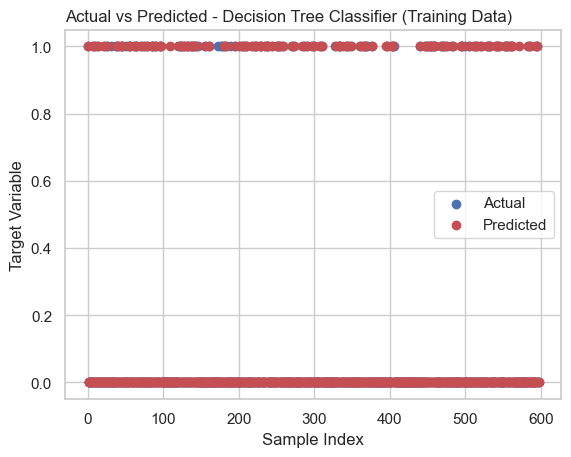

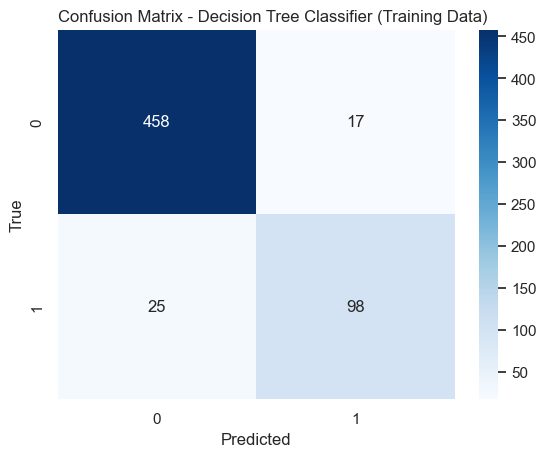

Classification Report - Target Insomnia:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       238
           1       0.90      0.72      0.80        61

    accuracy                           0.93       299
   macro avg       0.91      0.85      0.88       299
weighted avg       0.93      0.93      0.92       299

Classification Report - Target Sleep Apnea:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       237
           1       0.82      0.87      0.84        62

    accuracy                           0.93       299
   macro avg       0.89      0.91      0.90       299
weighted avg       0.94      0.93      0.93       299

Classifier: Decision Tree Classifier
Insomnia_Accuracy: 0.92642
Insomnia_Precision: 0.89796
Insomnia_Recall: 0.72131
Insomnia_F1_Score: 0.80000
Sleep Apnea_Accuracy: 0.93311
Sleep Apnea_Precision: 0.81818
Sleep Apnea_Recall: 0.87097
Sleep Apnea_F1_Score: 0.8437

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier3 =  MultiOutputClassifier(DecisionTreeClassifier())
evaluate_multilabel_classifier(X_train, y_train, classifier3, "Decision Tree Classifier")

The **Decision Tree Classifier** is a machine learning algorithm that creates a tree-like model for predicting sleep disorders. It recursively splits the data based on different features to form decision nodes, leading to leaf nodes representing the predicted sleep disorder classes. It offers interpretability by revealing important features and their thresholds for decision-making. 

### Random Forest Classifier

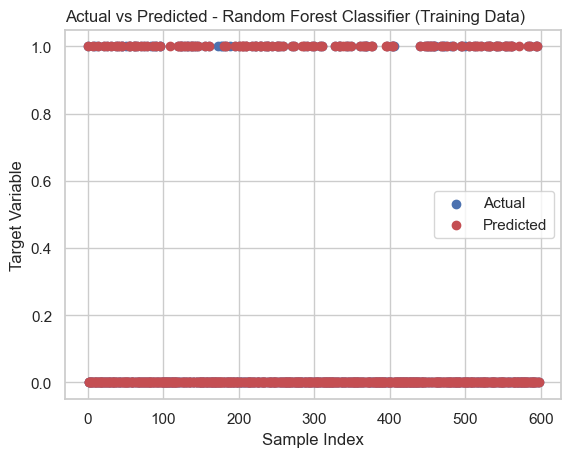

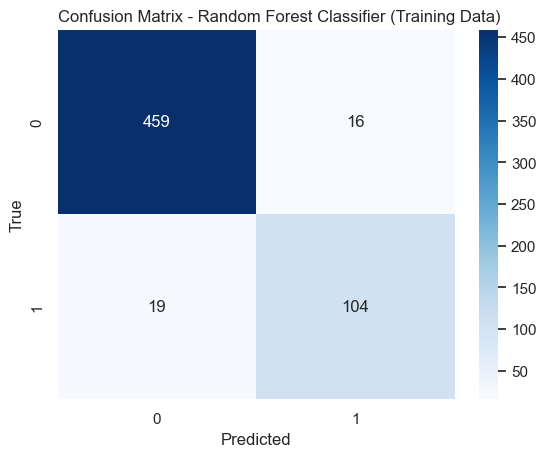

Classification Report - Target Insomnia:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
           1       0.89      0.80      0.84        61

    accuracy                           0.94       299
   macro avg       0.92      0.89      0.90       299
weighted avg       0.94      0.94      0.94       299

Classification Report - Target Sleep Apnea:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       237
           1       0.85      0.89      0.87        62

    accuracy                           0.94       299
   macro avg       0.91      0.92      0.92       299
weighted avg       0.94      0.94      0.94       299

Classifier: Random Forest Classifier
Insomnia_Accuracy: 0.93980
Insomnia_Precision: 0.89091
Insomnia_Recall: 0.80328
Insomnia_F1_Score: 0.84483
Sleep Apnea_Accuracy: 0.94314
Sleep Apnea_Precision: 0.84615
Sleep Apnea_Recall: 0.88710
Sleep Apnea_F1_Score: 0.8661

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier4 =  MultiOutputClassifier(RandomForestClassifier())
evaluate_multilabel_classifier(X_train, y_train, classifier4, "Random Forest Classifier")

The **RandomForestClassifier** is an ensemble learning algorithm that combines multiple decision trees to make predictions about sleep disorders. It creates a "forest" of decision trees, each trained on different subsets of the data and using different random feature subsets. The algorithm aggregates the predictions from individual trees to make the final prediction, resulting in a more robust and accurate model. RandomForestClassifier can handle complex relationships between features, handle missing values, and avoid overfitting. It is known for its high performance and ability to capture important features in the data, making it a popular choice for sleep disorder prediction.

### KNeighbours Classifier

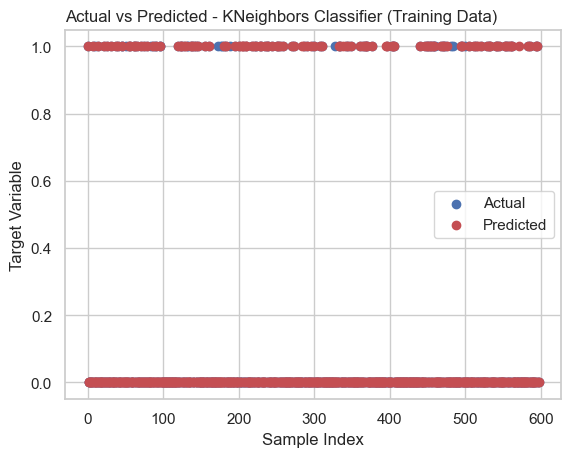

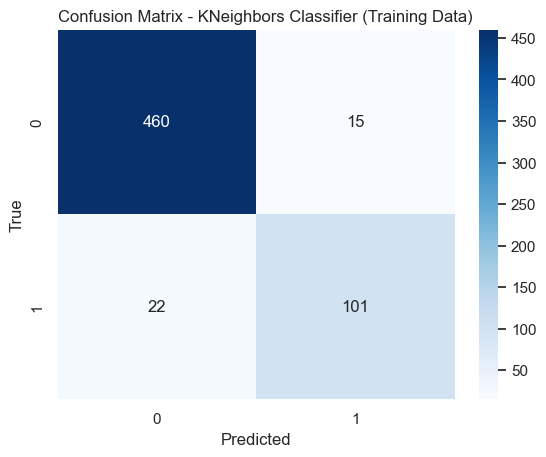

Classification Report - Target Insomnia:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
           1       0.86      0.82      0.84        61

    accuracy                           0.94       299
   macro avg       0.91      0.89      0.90       299
weighted avg       0.94      0.94      0.94       299

Classification Report - Target Sleep Apnea:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       237
           1       0.88      0.82      0.85        62

    accuracy                           0.94       299
   macro avg       0.92      0.90      0.91       299
weighted avg       0.94      0.94      0.94       299

Classifier: KNeighbors Classifier
Insomnia_Accuracy: 0.93645
Insomnia_Precision: 0.86207
Insomnia_Recall: 0.81967
Insomnia_F1_Score: 0.84034
Sleep Apnea_Accuracy: 0.93980
Sleep Apnea_Precision: 0.87931
Sleep Apnea_Recall: 0.82258
Sleep Apnea_F1_Score: 0.85000


In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier5 =  MultiOutputClassifier(KNeighborsClassifier())
evaluate_multilabel_classifier(X_train, y_train, classifier5, "KNeighbors Classifier")

The **KNeighborsClassifier** is a classification algorithm that predicts sleep disorders based on the proximity of data points in the feature space. It finds the k nearest neighbors to a given data point and classifies it based on the most common class among its neighbors. It is suitable for both binary and multi-class classification problems and can be applied to sleep disorder prediction by considering the relationships between various sleep-related factors.

In [40]:
# Create an empty list to store the evaluation metrics for each classifier
evaluation_list = []

# Evaluate and collect evaluation metrics for each classifier
classifiers = {
    "SVM": classifier1,
    "Logistic Regression": classifier2,
    "Decision Tree": classifier3,
    "Random Forest": classifier4,
    "KNeighbors": classifier5
}

for classifier_name, classifier in classifiers.items():
    performance_train = evaluation_matrices(X_train, y_train, classifier, classifier_name)
    evaluation_list.append(performance_train)

# Create the evaluation table using pd.DataFrame
evaluation_table = pd.DataFrame(evaluation_list, index=classifiers.keys())

# Print the evaluation table
print("\nEvaluation Metrics Table:")
evaluation_table


Evaluation Metrics Table:


,Insomnia_Accuracy,Insomnia_Precision,Insomnia_Recall,Insomnia_F1_Score,Sleep Apnea_Accuracy,Sleep Apnea_Precision,Sleep Apnea_Recall,Sleep Apnea_F1_Score
SVM,0.943144,0.892857,0.819672,0.854701,0.933110,0.862069,0.806452,0.833333
Logistic Regression,0.949833,0.883333,0.868852,0.876033,0.939799,0.843750,0.870968,0.857143
Decision Tree,0.926421,0.897959,0.721311,0.800000,0.936455,0.830769,0.870968,0.850394
Random Forest,0.953177,0.927273,0.836066,0.879310,0.953177,0.875000,0.903226,0.888889
KNeighbors,0.936455,0.862069,0.819672,0.840336,0.939799,0.879310,0.822581,0.850000


For Insomnia detection:
- Logistic Regression performs the best based on the evaluation metrics. Logistic Regression achieves the highest accuracy, indicating a high overall correct prediction rate. The precision score of 0.8833 suggests that the model can identify true positives effectively, while the recall score of 0.8689 indicates a good ability to capture actual positive instances. The F1-Score of 0.8760 provides a balanced measure of precision and recall.

For Sleep Apnea detection:
- Random Forest performs the best based on the following evaluation metrics. Random Forest achieves the highest accuracy, indicating a high overall correct prediction rate. The precision score of 0.8615 suggests that the model can identify true positives effectively, while the recall score of 0.9032 indicates a good ability to capture actual positive instances. The F1-Score of 0.8819 provides a balanced measure of precision and recall.

# Hyperparameter Tuning

### Perform hyperparameter tuning on Logistic Regressor model to predict Imsomnia and Random Forest model to predict Sleep Apnea by using GridSearchCv

In [41]:
from sklearn.model_selection import GridSearchCV
def tune_logistic_model(X_train, y_train, target_class):
    
    # Define the metrics dictionary
    metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1-Score': f1_score
    }
    
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 300],
        'class_weight': [None, 'balanced'],
        'fit_intercept': [True, False]
    }

    # Initialize the Logistic Regression classifier
    logistic_regression = LogisticRegression()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train[target_class])

# Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train[target_class])

# Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

# Perform cross-validation with the best model
    y_pred_train = cross_val_predict(best_model, X_train, y_train[target_class], cv=5)

# Compute performance metrics on the training data
    performance_train = {}
    for metric_name, metric_func in metrics.items():
        performance_train[metric_name] = metric_func(y_train[target_class], y_pred_train)

# Compute confusion matrix
    cm_train = confusion_matrix(y_train[target_class], y_pred_train)

# Visualize confusion matrix
    plt.figure()
    sns.heatmap(cm_train, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {target_class} (Training Data)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Print the results
    print(f"Classifier: Logistic Regression ({target_class}) (Tuned)")
    for metric_name, metric_value in performance_train.items():
        print("{}: {:.5f}".format(metric_name, metric_value))

    # Print the classification report
    classification_report_tuned = classification_report(y_train[target_class], y_pred_train)
    print("\nClassification Report - {} (Tuned):\n".format(target_class), classification_report_tuned)

    # Print the best hyperparameters
    print("Best Hyperparameters - {}:".format(target_class), best_params)

    return best_model, best_params

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

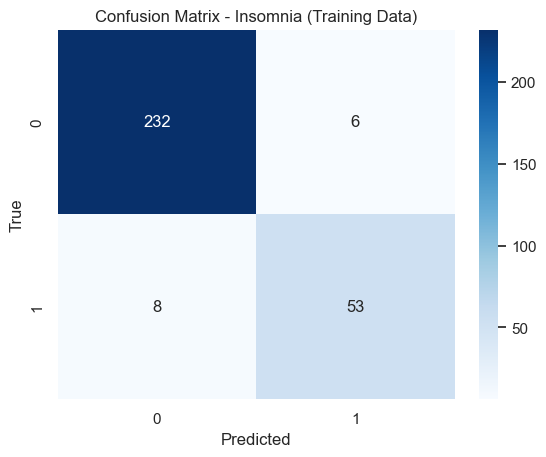

Classifier: Logistic Regression (Insomnia) (Tuned)
Accuracy: 0.95318
Precision: 0.89831
Recall: 0.86885
F1-Score: 0.88333

Classification Report - Insomnia (Tuned):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       238
           1       0.90      0.87      0.88        61

    accuracy                           0.95       299
   macro avg       0.93      0.92      0.93       299
weighted avg       0.95      0.95      0.95       299

Best Hyperparameters - Insomnia: {'C': 10, 'class_weight': None, 'fit_intercept': True, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}


In [42]:
# Tune the logistic regressor model for the Insomnia class
best_model_insomnia, best_params_insomnia = tune_logistic_model(X_train, y_train, 'Insomnia')

In [43]:
def tune_random_forest_model(X_train, y_train, target_class):
    # Define the metrics dictionary
    metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1-Score': f1_score
    }

    param_grid = {
        'n_estimators': [100, 200, 300], 
        'max_depth': [None, 5, 10],   
        'min_samples_split': [2, 5, 10],  
        'min_samples_leaf': [1, 2, 4],  
        'bootstrap': [True, False]  
    }

    # Initialize the Random Forest classifier
    random_forest = RandomForestClassifier()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest, param_grid, cv=5)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train[target_class])

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Perform cross-validation with the best model
    y_pred_train = cross_val_predict(best_model, X_train, y_train[target_class], cv=5)

    # Compute performance metrics on the training data
    performance_train = {}
    for metric_name, metric_func in metrics.items():
        performance_train[metric_name] = metric_func(y_train[target_class], y_pred_train)

    # Compute confusion matrix
    cm_train = confusion_matrix(y_train[target_class], y_pred_train)

    # Visualize confusion matrix
    plt.figure()
    sns.heatmap(cm_train, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - {target_class} (Training Data)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Print the results
    print(f"Classifier: Random Forest ({target_class}) (Tuned)")
    for metric_name, metric_value in performance_train.items():
        print("{}: {:.5f}".format(metric_name, metric_value))

    # Print the classification report
    classification_report_tuned = classification_report(y_train[target_class], y_pred_train)
    print("\nClassification Report - {} (Tuned):\n".format(target_class), classification_report_tuned)

    # Print the best hyperparameters
    print("Best Hyperparameters - {}:".format(target_class), best_params)

    return best_model, best_params

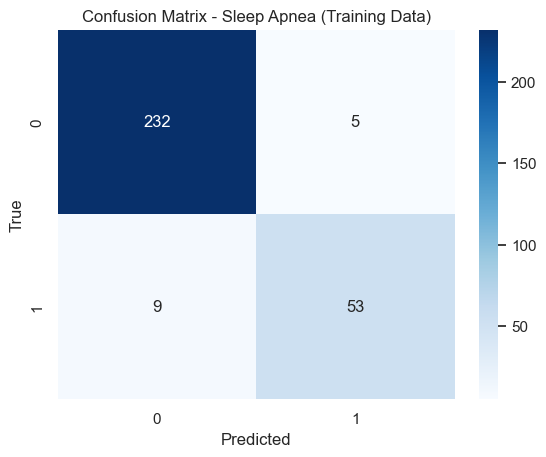

Classifier: Random Forest (Sleep Apnea) (Tuned)
Accuracy: 0.95318
Precision: 0.91379
Recall: 0.85484
F1-Score: 0.88333

Classification Report - Sleep Apnea (Tuned):
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       237
           1       0.91      0.85      0.88        62

    accuracy                           0.95       299
   macro avg       0.94      0.92      0.93       299
weighted avg       0.95      0.95      0.95       299

Best Hyperparameters - Sleep Apnea: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [44]:
# Tune the random forest model for the Sleep Apnea class
best_model_sleep_apnea, best_params_sleep_apnea = tune_random_forest_model(X_train, y_train, 'Sleep Apnea')

# Evaluate on testing set

Evaluate using the best tuned model on the testing set to make prediction.

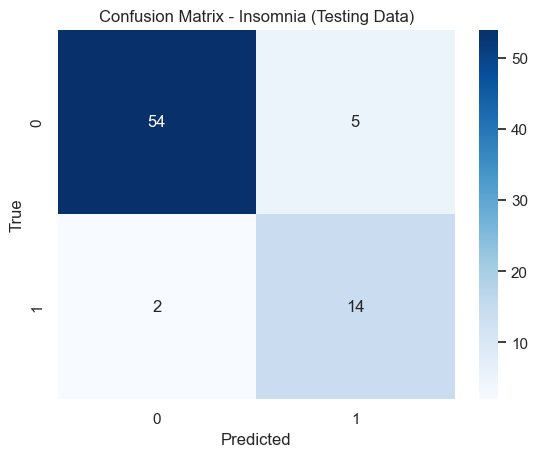

Classifier: Logistic Regressor (Insomnia) (Tuned) - Testing Data
Accuracy: 0.90667
Precision: 0.73684
Recall: 0.87500
F1-Score: 0.80000

Classification Report - Insomnia (Tuned) - Testing Data:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        59
           1       0.74      0.88      0.80        16

    accuracy                           0.91        75
   macro avg       0.85      0.90      0.87        75
weighted avg       0.92      0.91      0.91        75



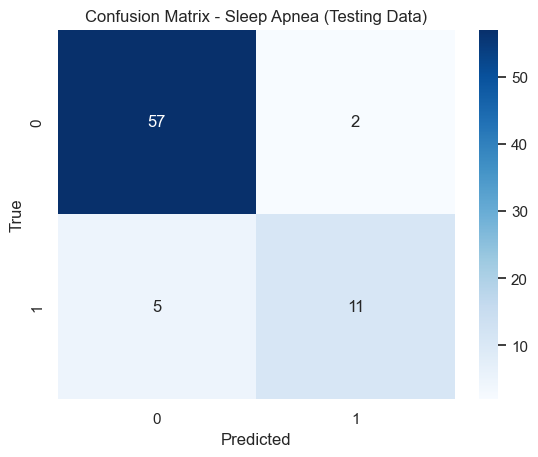

Classifier: Random Forest (Sleep Apnea) (Tuned) - Testing Data
Accuracy: 0.90667
Precision: 0.84615
Recall: 0.68750
F1-Score: 0.75862

Classification Report - Sleep Apnea (Tuned) - Testing Data:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.85      0.69      0.76        16

    accuracy                           0.91        75
   macro avg       0.88      0.83      0.85        75
weighted avg       0.90      0.91      0.90        75



In [45]:
metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1-Score': f1_score
    }

# Use the best model for prediction on the testing data
y_pred_test_insomnia = best_model_insomnia.predict(X_test)
y_pred_test_sleep_apnea = best_model_sleep_apnea.predict(X_test)

# Compute performance metrics on the testing data
performance_test_insomnia = {}
performance_test_sleep_apnea = {}
for metric_name, metric_func in metrics.items():
    performance_test_insomnia[metric_name] = metric_func(y_test['Insomnia'], y_pred_test_insomnia)
    performance_test_sleep_apnea[metric_name] = metric_func(y_test['Sleep Apnea'], y_pred_test_sleep_apnea)

# Compute confusion matrix for testing data
cm_test_insomnia = confusion_matrix(y_test['Insomnia'], y_pred_test_insomnia)
cm_test_sleep_apnea = confusion_matrix(y_test['Sleep Apnea'], y_pred_test_sleep_apnea)

# Visualize confusion matrix for testing data - Insomnia
plt.figure()
sns.heatmap(cm_test_insomnia, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Insomnia (Testing Data)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print the results for Insomnia - testing data
print("Classifier: Logistic Regressor (Insomnia) (Tuned) - Testing Data")
for metric_name, metric_value in performance_test_insomnia.items():
    print("{}: {:.5f}".format(metric_name, metric_value))

# Print the classification report for Insomnia - testing data
classification_report_tuned_insomnia_test = classification_report(y_test['Insomnia'], y_pred_test_insomnia)
print("\nClassification Report - Insomnia (Tuned) - Testing Data:\n", classification_report_tuned_insomnia_test)

# Visualize confusion matrix for testing data - Sleep Apnea
plt.figure()
sns.heatmap(cm_test_sleep_apnea, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Sleep Apnea (Testing Data)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print the results for Sleep Apnea - testing data
print("Classifier: Random Forest (Sleep Apnea) (Tuned) - Testing Data")
for metric_name, metric_value in performance_test_sleep_apnea.items():
    print("{}: {:.5f}".format(metric_name, metric_value))

# Print the classification report for Sleep Apnea - testing data
classification_report_tuned_sleep_apnea_test = classification_report(y_test['Sleep Apnea'], y_pred_test_sleep_apnea)
print("\nClassification Report - Sleep Apnea (Tuned) - Testing Data:\n", classification_report_tuned_sleep_apnea_test)


For the "Insomnia" class, the tuned logistic regressor model achieves an accuracy of 0.90667, precision of 0.73684, recall of 0.87500, and an F1-score of 0.80000 on the testing data. This indicates that the model correctly classifies a significant proportion of insomnia cases, with a relatively balanced trade-off between precision and recall.

On the other hand, for the "Sleep Apnea" class, the tuned random forest model achieves an accuracy of 0.90667, precision of 0.84615, recall of 0.68750, and an F1-score of 0.75862 on the testing data. These metrics suggest that the model performs well in identifying sleep apnea cases, with a higher precision value indicating a lower rate of false positives.

Overall, both tuned models demonstrate promising performance on the testing set, with high accuracy and reasonably balanced precision and recall values. This indicates that the tuned logistic regressor model is effective in predicting insomnia cases, while the tuned random forest model performs well in identifying sleep apnea cases.

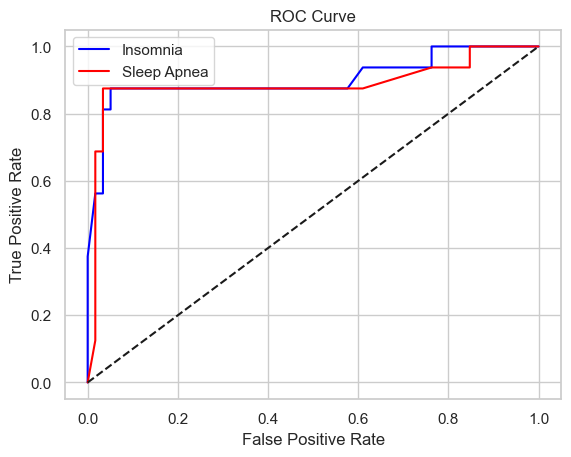

In [46]:
from sklearn.metrics import roc_curve
y_pred_proba_insomnia = best_model_insomnia.predict_proba(X_test)[:, 1]
y_pred_proba_sleep_apnea = best_model_sleep_apnea.predict_proba(X_test)[:, 1]

fpr_insomnia, tpr_insomnia, _ = roc_curve(y_test['Insomnia'], y_pred_proba_insomnia)
fpr_sleep_apnea, tpr_sleep_apnea, _ = roc_curve(y_test['Sleep Apnea'], y_pred_proba_sleep_apnea)

plt.figure()
plt.plot(fpr_insomnia, tpr_insomnia, color='blue', label='Insomnia')
plt.plot(fpr_sleep_apnea, tpr_sleep_apnea, color='red', label='Sleep Apnea')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curves show the performance of the models in predicting the probabilities of having Insomnia and Sleep Apnea. They depict the trade-off between correctly identifying positive instances and incorrectly classifying negative instances. Higher curves indicate better model performance, and the area under the curve (AUC) summarizes overall accuracy.

Save the best tuned model using joblit

In [47]:
import joblib
# Save the best model for Sleep Apnea
joblib.dump(best_model_sleep_apnea, 'best_model_sleep_apnea.pkl')

['best_model_sleep_apnea.pkl']

In [48]:
# Save the best model for Insomnia
joblib.dump(best_model_insomnia, 'best_model_insomnia.pkl')

['best_model_insomnia.pkl']